# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# WeatherPy Analysis

### -Latitude vs. Temperature
##### *The closer to the equator the hotter it is.
##### *Between latitudes -20 and 20 are the hottest temperature in the cities.
##### *The far a city is from the equator the colder it is.
### -Latitude vs. Humidity
##### *The data seems to be spread and hard to define where.
##### *The cities with the highest humidity are located between latitudes 40-75 
### -Latitude vs. Cloudiness
##### * The cloudiness is everywhere depending of the weather changes
### -Latitude vs. Wind Speed
##### *The colder the temperature is the more wind that blows


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import pycountry
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#API CAll 
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key
target_url

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=a26cbf7a180fbbd2f89938abf58ec8fd'

In [4]:
# set up lists to hold reponse info
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

#  response = requests.get(query_url + city).json()
    
# Loop through the list of cities and perform a request for data on each

for city in cities:
    weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("Record not found") 
        pass
        
print("End of Data")

Processing record 1 of Set 1 | talnakh
Processing record 2 of Set 1 | teknaf
Processing record 3 of Set 1 | los llanos de aridane
Processing record 4 of Set 1 | carnarvon
Processing record 5 of Set 1 | bethel
Processing record 6 of Set 1 | yellowknife
Processing record 7 of Set 1 | ambo
Processing record 8 of Set 1 | mahebourg
Processing record 9 of Set 1 | borgarnes
Processing record 10 of Set 1 | ekhabi
Processing record 11 of Set 1 | wajir
Processing record 12 of Set 1 | ushuaia
Processing record 13 of Set 1 | madang
Processing record 14 of Set 1 | asmar
Processing record 15 of Set 1 | vao
Processing record 16 of Set 1 | busselton
Processing record 17 of Set 1 | rio gallegos
Processing record 18 of Set 1 | kapaa
Processing record 19 of Set 1 | imbituba
Processing record 20 of Set 1 | redmond
Record not found
Processing record 21 of Set 1 | jamestown
Record not found
Processing record 22 of Set 1 | jharsuguda
Processing record 23 of Set 1 | east london
Processing record 24 of Set 1 |

Processing record 190 of Set 1 | rafaela
Processing record 191 of Set 1 | bilma
Processing record 192 of Set 1 | muros
Processing record 193 of Set 1 | port moresby
Processing record 194 of Set 1 | kasama
Processing record 195 of Set 1 | khvastovichi
Processing record 196 of Set 1 | zhangjiakou
Processing record 197 of Set 1 | rawson
Processing record 198 of Set 1 | yenagoa
Processing record 199 of Set 1 | misratah
Processing record 200 of Set 1 | lhokseumawe
Processing record 201 of Set 1 | broome
Processing record 202 of Set 1 | dolzhanskaya
Processing record 203 of Set 1 | khatanga
Processing record 204 of Set 1 | antiguo morelos
Processing record 205 of Set 1 | anadyr
Processing record 206 of Set 1 | naze
Processing record 207 of Set 1 | salalah
Processing record 208 of Set 1 | palmer
Processing record 209 of Set 1 | rocha
Processing record 210 of Set 1 | uthal
Processing record 211 of Set 1 | krasnorechenskiy
Processing record 212 of Set 1 | caravelas
Processing record 213 of Set 

Processing record 379 of Set 1 | lithgow
Processing record 380 of Set 1 | qandala
Processing record 381 of Set 1 | qurbus
Processing record 382 of Set 1 | oranjemund
Record not found
Processing record 383 of Set 1 | kulhudhuffushi
Processing record 384 of Set 1 | nyamuswa
Processing record 385 of Set 1 | mantua
Processing record 386 of Set 1 | calvillo
Processing record 387 of Set 1 | moree
Processing record 388 of Set 1 | kerema
Processing record 389 of Set 1 | aklavik
Processing record 390 of Set 1 | guerrero negro
Processing record 391 of Set 1 | isla mujeres
Processing record 392 of Set 1 | pisco
Processing record 393 of Set 1 | alyangula
Processing record 394 of Set 1 | beeville
Processing record 395 of Set 1 | porto walter
Processing record 396 of Set 1 | parksepa
Processing record 397 of Set 1 | sawakin
Processing record 398 of Set 1 | arlit
Processing record 399 of Set 1 | muroto
Processing record 400 of Set 1 | ariogala
Processing record 401 of Set 1 | itaquyry
Processing reco

Processing record 569 of Set 1 | saint-georges
Record not found
Processing record 570 of Set 1 | bacolod
Processing record 571 of Set 1 | la asuncion
Processing record 572 of Set 1 | kamina
Processing record 573 of Set 1 | la libertad
Record not found
Processing record 574 of Set 1 | fereydun kenar
Processing record 575 of Set 1 | olga
End of Data


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4, sort_keys=True))

{
    "city": {
        "coord": {
            "lat": 43.7444,
            "lon": 135.2892
        },
        "country": "RU",
        "id": 2018553,
        "name": "Ol'ga",
        "population": 4328,
        "sunrise": 1607898304,
        "sunset": 1607930525,
        "timezone": 36000
    },
    "cnt": 40,
    "cod": "200",
    "list": [
        {
            "clouds": {
                "all": 0
            },
            "dt": 1607925600,
            "dt_txt": "2020-12-14 06:00:00",
            "main": {
                "feels_like": -5.53,
                "grnd_level": 1014,
                "humidity": 75,
                "pressure": 1016,
                "sea_level": 1016,
                "temp": 9.12,
                "temp_kf": -0.03,
                "temp_max": 9.18,
                "temp_min": 9.12
            },
            "pop": 0,
            "sys": {
                "pod": "d"
            },
            "visibility": 10000,
            "weather": [
                {
    

}


In [6]:
weather_json.keys()

dict_keys(['cod', 'message', 'cnt', 'list', 'city'])

In [7]:
# Convert the arrays of json into DataFrame
weather_dict= {"City": cityname, "Latitude": lat, "Longitude": lng,
               "Max Temp_F": max_temp, "Humidity_%": humidity, "Cloudiness_%": cloudiness,
               "Wind Speed": wind_speed, "Country": country, "Date": date}
# weather_dict
weather_df= pd.DataFrame(weather_dict)
weather_df.head()

,City,Latitude,Longitude,Max Temp_F,Humidity_%,Cloudiness_%,Wind Speed,Country,Date
0,Talnakh,69.4865,88.3972,-20.72,81,48,4.18,RU,1607925600
1,Teknāf,20.8624,92.3058,81.55,54,0,7.14,BD,1607925600
2,Los Llanos de Aridane,28.6585,-17.9182,63.37,87,58,6.60,ES,1607925600
3,Carnarvon,-24.8667,113.6333,78.28,48,0,21.30,AU,1607925600
4,Bethel,41.3712,-73.4140,36.21,83,26,3.04,US,1607925600


In [8]:
# Export the city data into a .csv.
weather_df
weather_df.to_csv("../output_data/weather_df.csv", index= False)
# weather_df = weather_df.to_csv()

In [9]:
# Record data len()
count= len(weather_df)
count

575

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# Skip this step if there are no cities that have humidity > 100%.
weather_df.describe()

,Latitude,Longitude,Max Temp_F,Humidity_%,Cloudiness_%,Wind Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,19.008481,19.418750,52.561443,75.153043,57.146087,9.308365,1.607926e+09
std,33.394174,90.863438,28.847828,18.192090,38.833598,7.049928,0.000000e+00
min,-54.800000,-175.200000,-42.300000,16.000000,0.000000,0.130000,1.607926e+09
25%,-8.881700,-61.184900,33.275000,66.000000,18.500000,4.205000,1.607926e+09
50%,23.795000,24.990600,60.940000,80.000000,64.000000,7.450000,1.607926e+09
75%,45.386700,99.576650,76.695000,88.000000,95.000000,12.660000,1.607926e+09
max,78.218600,179.316700,99.190000,100.000000,100.000000,43.110000,1.607926e+09


In [11]:
# ax1 = weather_df.plot.scatter(x='City',
#                       y='Humidity_%',
#                       c='DarkBlue')

In [12]:
#  Get the indices of cities that have humidity over 100%.
clean_weather_df = weather_df[weather_df['Humidity_%']<=100]
clean_weather_df.head()

,City,Latitude,Longitude,Max Temp_F,Humidity_%,Cloudiness_%,Wind Speed,Country,Date
0,Talnakh,69.4865,88.3972,-20.72,81,48,4.18,RU,1607925600
1,Teknāf,20.8624,92.3058,81.55,54,0,7.14,BD,1607925600
2,Los Llanos de Aridane,28.6585,-17.9182,63.37,87,58,6.60,ES,1607925600
3,Carnarvon,-24.8667,113.6333,78.28,48,0,21.30,AU,1607925600
4,Bethel,41.3712,-73.4140,36.21,83,26,3.04,US,1607925600


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data= clean_weather_df
clean_city_data


,City,Latitude,Longitude,Max Temp_F,Humidity_%,Cloudiness_%,Wind Speed,Country,Date
0,Talnakh,69.4865,88.3972,-20.72,81,48,4.18,RU,1607925600
1,Teknāf,20.8624,92.3058,81.55,54,0,7.14,BD,1607925600
2,Los Llanos de Aridane,28.6585,-17.9182,63.37,87,58,6.60,ES,1607925600
3,Carnarvon,-24.8667,113.6333,78.28,48,0,21.30,AU,1607925600
4,Bethel,41.3712,-73.4140,36.21,83,26,3.04,US,1607925600
...,...,...,...,...,...,...,...,...,...
570,La Asuncion,11.0333,-63.8628,78.62,87,0,12.17,VE,1607925600
571,Kamina,-8.7386,24.9906,64.20,98,100,1.95,CD,1607925600
572,La Libertad,-2.2333,-80.9000,71.87,84,69,10.22,EC,1607925600
573,Fereydūnkenār,36.6864,52.5225,48.36,54,4,5.50,IR,1607925600


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

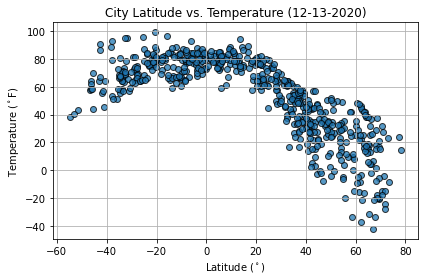

In [14]:
# Latitude vs. Temperature Plot

date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(clean_city_data["Latitude"], clean_city_data["Max Temp_F"], alpha=.75, edgecolors="k")

plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Temperature ($^\circ$F)")

plt.grid(True) 

plt.tight_layout()

plt.savefig("../output_data/City_Latitude_vs_Temperature.png")

plt.show()

In [15]:
#Method 2
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html
# ax2= clean_city_data.plot.scatter(x= "Latitude",
#                                   y= "Max Temp_F",
#                                   c= "darkblue",
#                                   colormap= "viridis")
# ax2.set_xticklabels("Latitude")


# plt.title(f"City Latitude vs. Temperature ({date})")
# plt.xlabel("Latitude ($^\circ$)")
# plt.ylabel("Temperature ($^\circ$F)")

# plt.grid(True) 

# # plt.tight_layout()
# # plt.savefig("City_Latitude_vs_Temperature.png")
# plt.show()

#Method 3
# clean_city_data.plot(kind="scatter", x="Latitude", y="Max Temp_F", s=50, cmap="plasma", edgecolors="k",figsize=(10, 7))

# # plt.savefig("scatter-3.png", bbox_inches="tight")


# plt.title(f"City Latitude vs. Temperature ({date})")
# plt.xlabel("Latitude ($^\circ$)")
# plt.ylabel("Temperature ($^\circ$F)")
# plt.grid(True) 

#Method 4
# scatlat = clean_city_data["Latitude"]
# scattemp = clean_city_data["Max Temp_F"]

# plt.scatter(scatlat,scattemp)
# plt.title('City Latitude vs. Max Temperature (F) 2020-12-13')
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature (F)')

# plt.grid()

# # plt.savefig('scatplotlatitudemaxtemp')

# plt.show()

## Latitude vs. Humidity Plot

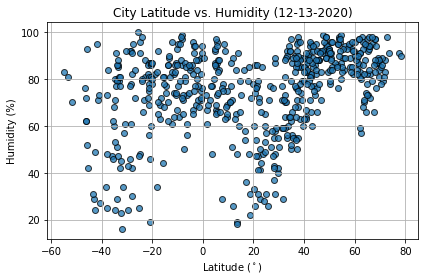

In [16]:
# Latitude vs. Humidity Plot

plt.scatter(clean_city_data["Latitude"], clean_city_data["Humidity_%"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Humidity (%)")
plt.grid(True) 

plt.tight_layout()

plt.savefig("../output_data/City_Latitude_vs_Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

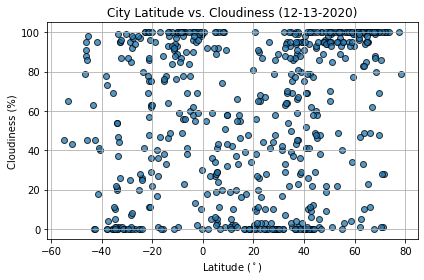

In [17]:
# Latitude vs. Cloudiness Plot

plt.scatter(clean_city_data["Latitude"], clean_city_data["Cloudiness_%"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Cloudiness (%)")

plt.grid(True) 

plt.tight_layout()

plt.savefig("../output_data/City_Latitude_vs_Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

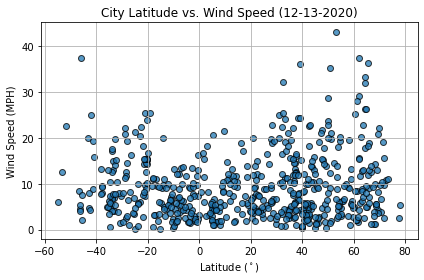

In [18]:
# Latitude vs. Wind Speed Plot

plt.scatter(clean_city_data["Latitude"], clean_city_data["Wind Speed"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Wind Speed (MPH)")

plt.grid(True) 

plt.tight_layout()

plt.savefig("../output_data/City_Latitude_vs_Wind.png")

plt.show()

## Linear Regression

In [19]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    
    plt.title(f"Linear Regression ({date})")
    plt.xlabel("Latitude ($^\circ$)")
    plt.ylabel("Wind Speed (MPH)")

#     plt.show()

    plt.savefig("../output_data/linear_regression")
    
#     plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
northernlat_df = clean_city_data.loc[clean_city_data["Latitude"] >= 0,:]
northernlat_df.head()


,City,Latitude,Longitude,Max Temp_F,Humidity_%,Cloudiness_%,Wind Speed,Country,Date
0,Talnakh,69.4865,88.3972,-20.72,81,48,4.18,RU,1607925600
1,Teknāf,20.8624,92.3058,81.55,54,0,7.14,BD,1607925600
2,Los Llanos de Aridane,28.6585,-17.9182,63.37,87,58,6.60,ES,1607925600
4,Bethel,41.3712,-73.4140,36.21,83,26,3.04,US,1607925600
5,Yellowknife,62.4560,-114.3525,-21.35,80,5,5.73,CA,1607925600


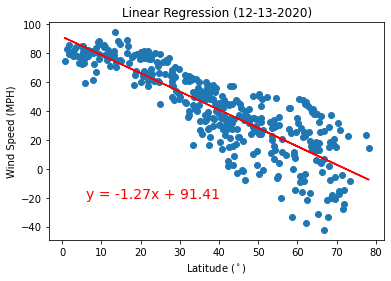

In [21]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = northernlat_df["Latitude"]
y_values = northernlat_df["Max Temp_F"]

plot_linear_regression(x_values,y_values,'Max Temp_F',(6,-20))

# plt.show()

plt.savefig("../output_data/northerntemplat.png")

# plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [22]:
southernlat_df = clean_city_data.loc[clean_city_data["Latitude"] < 0,:]
southernlat_df.head()

,City,Latitude,Longitude,Max Temp_F,Humidity_%,Cloudiness_%,Wind Speed,Country,Date
3,Carnarvon,-24.8667,113.6333,78.28,48,0,21.30,AU,1607925600
6,Ambo,-10.1308,-76.2047,60.19,67,93,0.25,PE,1607925600
7,Mahébourg,-20.4081,57.7000,78.93,87,63,15.26,MU,1607925600
11,Ushuaia,-54.8000,-68.3000,38.46,83,45,6.02,AR,1607925600
12,Madang,-5.2246,145.7966,82.53,84,78,4.32,PG,1607925600


The high r value indicates a strong positive correlation between latitude and max temperature.


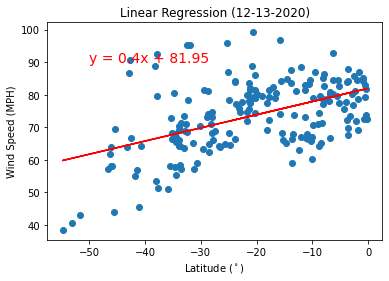

In [23]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = southernlat_df["Latitude"]
y_values = southernlat_df["Max Temp_F"]

plot_linear_regression(x_values,y_values,'Max Temp',(-50, 90))

# plt.show()

plt.savefig("../output_data/southerntemplat")

print("The high r value indicates a strong positive correlation between latitude and max temperature.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

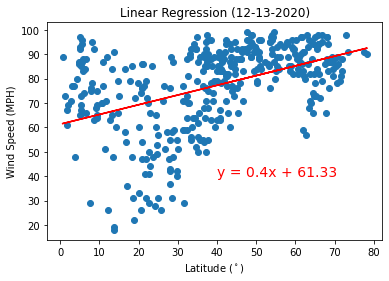

In [24]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = northernlat_df["Latitude"]
y_values = northernlat_df["Humidity_%"]

plot_linear_regression(x_values,y_values,'Humidity_%',(40, 40))

# plt.show()

plt.savefig("../output_data/northernhumlat")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The low r values indicate a weak to no relationship between humidity and latitude.


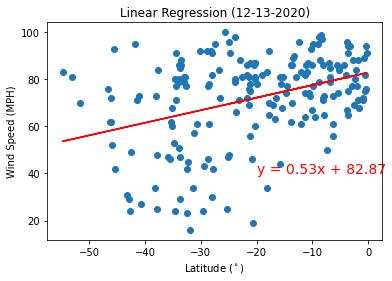

In [25]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = southernlat_df["Latitude"]
y_values = southernlat_df["Humidity_%"]

plot_linear_regression(x_values,y_values,'Humidity_%',(-20, 40))

# plt.show()

plt.savefig("../output_data/southernhumlat")

print("The low r values indicate a weak to no relationship between humidity and latitude.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

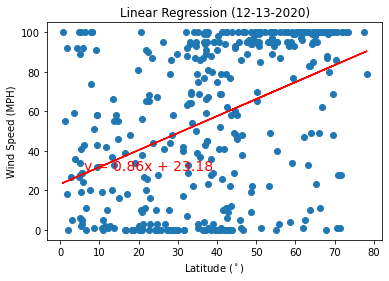

In [26]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = northernlat_df["Latitude"]
y_values = northernlat_df["Cloudiness_%"]

# plt.show()

plot_linear_regression(x_values,y_values,'Cloudiness_%',(6,30))

plt.savefig("../output_data/northerncloudlat")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The low r values indicate a weak positive relationship between latitude and cloudiness.


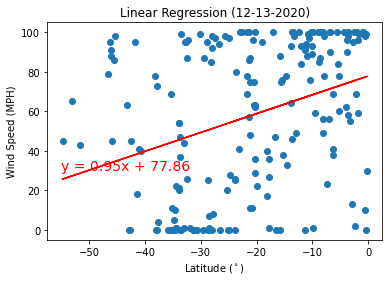

In [27]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = southernlat_df["Latitude"]
y_values = southernlat_df["Cloudiness_%"]
plot_linear_regression(x_values,y_values,'Cloudiness_%',(-55, 30))

# plt.show()

plt.savefig("../output_data/southerncloudlat")

print("The low r values indicate a weak positive relationship between latitude and cloudiness.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

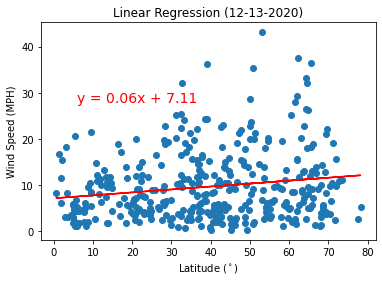

In [28]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = northernlat_df["Latitude"]
y_values = northernlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,28))

# plt.show()

plt.savefig("../output_data/northernwindlat")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The low r values indicate that there is no real relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.


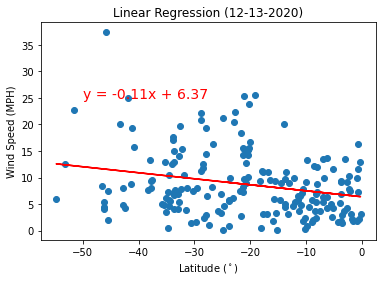

In [29]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = southernlat_df["Latitude"]
y_values = southernlat_df["Wind Speed"]

plot_linear_regression(x_values,y_values,'Wind Speed',(-50, 25))

# plt.show()

plt.savefig("../output_data/southernwindlat")

print("The low r values indicate that there is no real relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.")